In [1]:
import kagglehub
# data source https://www.kaggle.com/datasets/deependraverma13/all-songs-rating-review
# Download latest version
path = kagglehub.dataset_download("deependraverma13/all-songs-rating-review")

print("Path to dataset files:", path)

100%|██████████| 1.31M/1.31M [00:00<00:00, 86.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/deependraverma13/all-songs-rating-review/versions/1


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv(f"{path}/song.csv")
df = df.drop(df.columns[0], axis='columns')
df

,Name of the Song,Artist,Date of Release,Description,Metascore,User Score
0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9
4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN
...,...,...,...,...,...,...
198121,The Soft Bulletin,by The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7
198122,13,by Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6
198124,Central Reservation,by Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

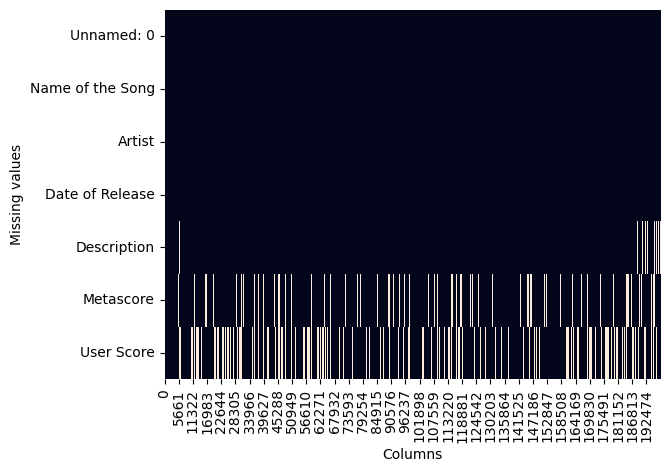

In [6]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

```.transpose()```: This method transposes the resulting boolean DataFrame, swapping rows and columns. This is done so that the heatmap displays columns along the x-axis and indicates the presence of missing values for each row in that column.

In [16]:
import numpy as np

df["Missing_Description"] = np.where(df["Description"].isna(), 1, 0)
# 1 if have missing_description 0 for else
df.loc[df['Missing_Description'] == 1 ]

# Get the index of rows where 'Missing_Description' is 1
rows_to_drop_index = df.loc[df['Missing_Description'] == 1 ].index

# Drop the rows using their index
df = df.drop(rows_to_drop_index, axis='rows')

df

,Name of the Song,Artist,Date of Release,Description,Metascore,User Score,Missing_Description
0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0
1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0
2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0
3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0
4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0
...,...,...,...,...,...,...,...
198121,The Soft Bulletin,by The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7,0
198122,13,by Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7,0
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6,0
198124,Central Reservation,by Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9,0


In [30]:
df['Year of Release'] = df["Date of Release"].str[-4:]
df
#df.loc[df['Year of Release'] == np.nan] only null value is in descroption column


,Name of the Song,Artist,Date of Release,Description,Metascore,User Score,Missing_Description,Year of Release
0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018
1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018
2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0,2017
3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018
4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0,2017
...,...,...,...,...,...,...,...,...
198121,The Soft Bulletin,by The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7,0,1999
198122,13,by Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7,0,1999
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6,0,1999
198124,Central Reservation,by Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9,0,1999


In [35]:
df['Year of Release'] = df['Year of Release'].astype(float)
df["Song Age"] = 2025 - (df['Year of Release'])
df

,Name of the Song,Artist,Date of Release,Description,Metascore,User Score,Missing_Description,Year of Release,Song Age
0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018.0,7.0
1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018.0,7.0
2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0,2017.0,8.0
3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018.0,7.0
4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0,2017.0,8.0
...,...,...,...,...,...,...,...,...,...
198121,The Soft Bulletin,by The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7,0,1999.0,26.0
198122,13,by Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7,0,1999.0,26.0
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6,0,1999.0,26.0
198124,Central Reservation,by Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9,0,1999.0,26.0


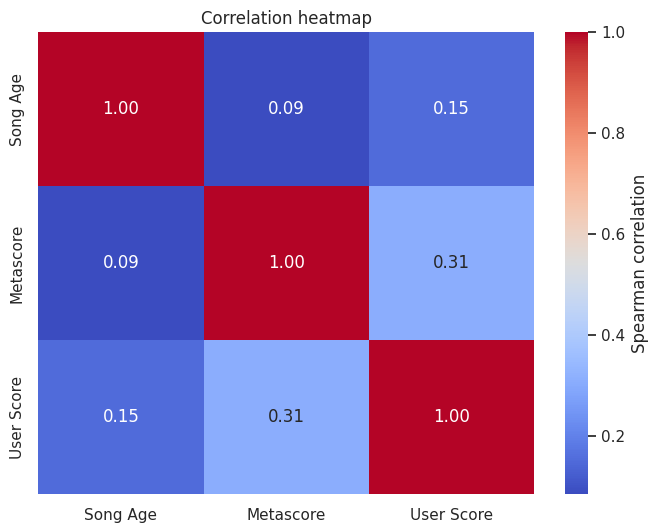

In [38]:
columns_of_interest = ["Song Age", "Metascore", "User Score"]

correlation_matrix = df[columns_of_interest].corr(method = "spearman")
# pearson method is suitable for continuous value but spearman for binary
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

**Pearson Correlation**: This is a parametric measure that assesses the strength and direction of a linear relationship between two continuous variables. It assumes that the data is normally distributed and that the relationship is linear.

**Spearman Correlation**: This is a non-parametric measure that assesses the strength and direction of a monotonic relationship between two variables. A monotonic relationship means that as one variable increases, the other either consistently increases or consistently decreases, but not necessarily at a constant rate (i.e., not strictly linear). Spearman correlation works by ranking the data and then calculating the Pearson correlation on the ranks. This makes it suitable for data that is not normally distributed, or for ordinal variables.

("Missing_Description") is binary (0 or 1), and Spearman is more robust to non-normal data and is suitable for ordinal or ranked data.

In [40]:
df["words_in_description"] = df["Description"].str.split().str.len()
df

,Name of the Song,Artist,Date of Release,Description,Metascore,User Score,Missing_Description,Year of Release,Song Age,words_in_description
0,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018.0,7.0,38
1,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018.0,7.0,38
2,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0,2017.0,8.0,27
3,Electric Ladyland [50th Anniversary Deluxe Edi...,by The Jimi Hendrix Experience,"November 9, 2018",The remastered of the 1968 album includes a di...,97.0,8.9,0,2018.0,7.0,38
4,50:50@50,by Fairport Convention,"March 17, 2017",The latest release from the British folk-rock ...,72.0,NaN,0,2017.0,8.0,27
...,...,...,...,...,...,...,...,...,...,...
198121,The Soft Bulletin,by The Flaming Lips,"June 22, 1999",The Dave Fridmann-produced 'Soft Bulletin' is ...,85.0,8.7,0,1999.0,26.0,30
198122,13,by Blur,"March 23, 1999",Damon Albarn's breakup album (he split with hi...,79.0,8.7,0,1999.0,26.0,47
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,"March 23, 1999",This second studio album for the experimental ...,75.0,8.6,0,1999.0,26.0,27
198124,Central Reservation,by Beth Orton,"March 9, 1999",This is the second album for the English singe...,84.0,8.9,0,1999.0,26.0,48


In [51]:
pd.set_option('display.max_colwidth', None)
df.loc[df["words_in_description"].between(25, 30), 'Description']

,Description
2,The latest release from the British folk-rock band includes both live and studio recorded tracks as well as guest appearances from Robert Plant and Pentangle's Jacqui McShee.
4,The latest release from the British folk-rock band includes both live and studio recorded tracks as well as guest appearances from Robert Plant and Pentangle's Jacqui McShee.
7,The latest release from the British folk-rock band includes both live and studio recorded tracks as well as guest appearances from Robert Plant and Pentangle's Jacqui McShee.
11,The latest release from the British folk-rock band includes both live and studio recorded tracks as well as guest appearances from Robert Plant and Pentangle's Jacqui McShee.
16,The latest release from the British folk-rock band includes both live and studio recorded tracks as well as guest appearances from Robert Plant and Pentangle's Jacqui McShee.
...,...
198101,"Spell MDFMK backwards and what do you get? Well, KMFDM fans know the answer, and may find the sound of this Sasha K.-led industrial band to be remarkably familiar."
198109,"The duo of Walter Becker and Donald Fagen return after a 20-year hiatus, with this Grammy-winning comeback album sounding as if they had never left."
198111,"Robert Smith declared 'Bloodflowers' to be the final release from The Cure. It wasn't, of course, but it does in theory complete a trilogy that began with 'Pornography' and 'Disintegration.'"
198121,"The Dave Fridmann-produced 'Soft Bulletin' is considered by many fans and critics to be the band's finest album, and found its way onto quite a few Best of 1999 lists."


In [70]:
df_edited = df[df["words_in_description"] >= 25]
pd.set_option('display.max_colwidth', 100)
#df_edited = df_edited.drop(["Missing_Description", "Date of Release", "words_in_description"], axis="columns" )
df_edited

,Name of the Song,Artist,Description,Metascore,User Score,Year of Release,Song Age
0,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,8.9,2018.0,7.0
1,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,8.9,2018.0,7.0
2,50:50@50,by Fairport Convention,The latest release from the British folk-rock band includes both live and studio recorded tracks...,72.0,NaN,2017.0,8.0
3,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,8.9,2018.0,7.0
4,50:50@50,by Fairport Convention,The latest release from the British folk-rock band includes both live and studio recorded tracks...,72.0,NaN,2017.0,8.0
...,...,...,...,...,...,...,...
198120,One Part Lullaby,by Folk Implosion,This is the third full-length and first major-label release for the low-fi duo of Lou Barlow (Se...,77.0,7.3,1999.0,26.0
198121,The Soft Bulletin,by The Flaming Lips,The Dave Fridmann-produced 'Soft Bulletin' is considered by many fans and critics to be the band...,85.0,8.7,1999.0,26.0
198122,13,by Blur,"Damon Albarn's breakup album (he split with his longtime girlfriend, Elastica's Justine Frischma...",79.0,8.7,1999.0,26.0
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,This second studio album for the experimental Elephant 6 band led by William Cullen Hart and Bil...,75.0,8.6,1999.0,26.0


In [73]:
invalid_name_rows = df_edited.loc[df_edited['Name of the Song'] == '50:50@50'].index
#df_edited = df_edited.drop(invalid_name_rows, axis='rows')
df_edited

,Name of the Song,Artist,Description,Metascore,User Score,Year of Release,Song Age
0,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,8.9,2018.0,7.0
1,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,8.9,2018.0,7.0
3,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,8.9,2018.0,7.0
5,Saint Cecilia EP,by Foo Fighters,The five-track free EP from the rock band was recorded during the Austin City Limits Festival at...,76.0,8.2,2015.0,10.0
6,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,8.9,2018.0,7.0
...,...,...,...,...,...,...,...
198120,One Part Lullaby,by Folk Implosion,This is the third full-length and first major-label release for the low-fi duo of Lou Barlow (Se...,77.0,7.3,1999.0,26.0
198121,The Soft Bulletin,by The Flaming Lips,The Dave Fridmann-produced 'Soft Bulletin' is considered by many fans and critics to be the band...,85.0,8.7,1999.0,26.0
198122,13,by Blur,"Damon Albarn's breakup album (he split with his longtime girlfriend, Elastica's Justine Frischma...",79.0,8.7,1999.0,26.0
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,This second studio album for the experimental Elephant 6 band led by William Cullen Hart and Bil...,75.0,8.6,1999.0,26.0


In [93]:
song_missing = df_edited[(df_edited['Metascore'].isna())].index
#df_edited = df_edited.drop(song_missing, axis='rows')
score_missing = df_edited[(df_edited['Metascore'].isna())]
score_missing


,Name of the Song,Artist,Description,Metascore,Year of Release,Song Age


In [84]:
song_missing = df_edited[(df_edited['User Score'].isna())]
song_missing
# seem to be a lot NaN in user score so better drop it
#df_edited = df_edited.drop(['User Score'], axis='columns')
#df_edited

,Name of the Song,Artist,Description,Metascore,Year of Release,Song Age
0,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,2018.0,7.0
1,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,2018.0,7.0
3,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,2018.0,7.0
5,Saint Cecilia EP,by Foo Fighters,The five-track free EP from the rock band was recorded during the Austin City Limits Festival at...,76.0,2015.0,10.0
6,Electric Ladyland [50th Anniversary Deluxe Edition],by The Jimi Hendrix Experience,"The remastered of the 1968 album includes a disc of early demos and outtakes, the soundboard rec...",97.0,2018.0,7.0
...,...,...,...,...,...,...
198120,One Part Lullaby,by Folk Implosion,This is the third full-length and first major-label release for the low-fi duo of Lou Barlow (Se...,77.0,1999.0,26.0
198121,The Soft Bulletin,by The Flaming Lips,The Dave Fridmann-produced 'Soft Bulletin' is considered by many fans and critics to be the band...,85.0,1999.0,26.0
198122,13,by Blur,"Damon Albarn's breakup album (he split with his longtime girlfriend, Elastica's Justine Frischma...",79.0,1999.0,26.0
198123,Black Foliage: Animation Music,by The Olivia Tremor Control,This second studio album for the experimental Elephant 6 band led by William Cullen Hart and Bil...,75.0,1999.0,26.0


In [95]:
(
    df_edited
    .to_csv("song_cleaned_complete.csv", index = False)
)

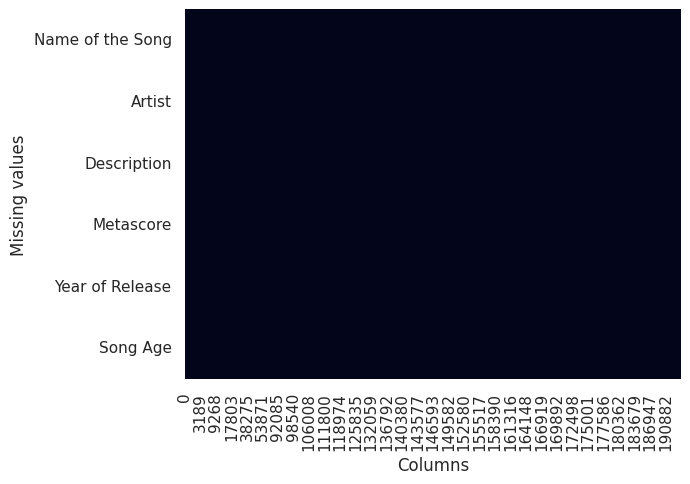

In [94]:
ax = plt.axes()
sns.heatmap(df_edited.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()